# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?q="



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_num = len(cities)
print(f'Found {city_num} cities!')

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for city in cities:
    response = requests.get(url + city + '&appid='+weather_api_key).json()
    print(f'Processing data for {city}!')
    try:
        lat.append(response['coord']['lat'])
    except:
        lat.append('NaN')
    try:
        lng.append(response['coord']['lon'])
    except:
        lng.append('NaN')
    try:
        max_temp.append(response['main']['temp_max'])
    except:
        max_temp.append('NaN')
    try:
        humidity.append(response['main']['humidity'])
    except:
        humidity.append('NaN')
    try:
        cloudiness.append(response['clouds']['all'])
    except:
        cloudiness.append('NaN')
    try:
        wind_speed.append(response['wind']['speed'])
    except:
        wind_speed.append('NaN')
    try:
        country.append(response['sys']['country'])
    except:
        country.append('NaN')
    try:    
        date.append(response['dt'])
    except:
        date.append('NaN')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    'City': cities,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv(output_data_file, index="false")
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-philippe,-21.3585,55.7679,299.26,78,0,2.57,RE,1612648007
1,havoysund,70.9963,24.6622,269.15,86,75,7.2,NO,1612648365
2,east london,-33.0153,27.9116,296.88,87,8,1.1,ZA,1612647992
3,vaitupu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hobart,-42.8794,147.329,289.82,59,75,4.63,AU,1612648012
...,...,...,...,...,...,...,...,...,...
606,leh,34.1667,77.5833,258.23,51,0,0.8,IN,1612648438
607,antsla,57.8256,26.5406,260.15,85,20,2.06,EE,1612648438
608,hokitika,-42.7167,170.967,291.19,73,4,1.53,NZ,1612648015
609,tranas,58.0372,14.9782,262.15,92,20,1.54,SE,1612648438


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
wet_df = weather_df.loc[weather_df['Humidity'] != 'NaN']
dry_df = wet_df.loc[wet_df['Humidity'] <= 100]
dry_df #no rows greater than 100% humidity found; filtered out missing data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-philippe,-21.3585,55.7679,299.26,78,0,2.57,RE,1612648007
1,havoysund,70.9963,24.6622,269.15,86,75,7.2,NO,1612648365
2,east london,-33.0153,27.9116,296.88,87,8,1.1,ZA,1612647992
4,hobart,-42.8794,147.329,289.82,59,75,4.63,AU,1612648012
6,cape town,-33.9258,18.4232,295.37,78,20,5.14,ZA,1612647776
...,...,...,...,...,...,...,...,...,...
605,cockburn town,21.4612,-71.1419,300.15,65,20,7.2,TC,1612648438
606,leh,34.1667,77.5833,258.23,51,0,0.8,IN,1612648438
607,antsla,57.8256,26.5406,260.15,85,20,2.06,EE,1612648438
608,hokitika,-42.7167,170.967,291.19,73,4,1.53,NZ,1612648015


In [6]:
#  Get the indices of cities that have humidity over 100%.
# NOTE: no cities with humidity over 100% found

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#question for tutor: should I use inplace = False here,  given my data?
clean_city_data= dry_df.loc[(dry_df['Lat']!="NaN") 
                            & (dry_df['Lng']!='NaN') 
                            & (dry_df['Max Temp']!='NaN')
                            & (dry_df['Cloudiness']!='NaN')
                            & (dry_df['Wind Speed']!='NaN')
                            & (dry_df['Country']!='NaN')
                            & (dry_df['Date']!='NaN')
                           ]
clean_city_data #the cleaning above didn't catch anything weird

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-philippe,-21.3585,55.7679,299.26,78,0,2.57,RE,1612648007
1,havoysund,70.9963,24.6622,269.15,86,75,7.2,NO,1612648365
2,east london,-33.0153,27.9116,296.88,87,8,1.1,ZA,1612647992
4,hobart,-42.8794,147.329,289.82,59,75,4.63,AU,1612648012
6,cape town,-33.9258,18.4232,295.37,78,20,5.14,ZA,1612647776
...,...,...,...,...,...,...,...,...,...
605,cockburn town,21.4612,-71.1419,300.15,65,20,7.2,TC,1612648438
606,leh,34.1667,77.5833,258.23,51,0,0.8,IN,1612648438
607,antsla,57.8256,26.5406,260.15,85,20,2.06,EE,1612648438
608,hokitika,-42.7167,170.967,291.19,73,4,1.53,NZ,1612648015


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

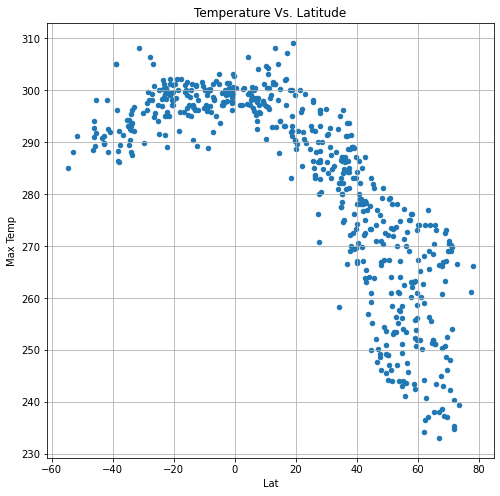

In [8]:
# Convert the "Lat" and 'Max Temp' columns to numeric to ensure the data can be used
clean_city_data['Lat'] = pd.to_numeric(clean_city_data['Lat'])
clean_city_data['Max Temp'] = pd.to_numeric(clean_city_data['Max Temp'])

# Create a scatter plot which compares Latitude to Temperature
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp (Kelvin)", grid=True, figsize=(7,7),
              title="Temperature Vs. Latitude")
plt.show()

Brief Anaylsis: This graph plots how maximum temperature varies with latitude. It is in Kelvin, which is the automatic format of the API. Because it is winter, northern hemisphere latitudes tend to have lower temperature than their absolute value equivalent southern hemisphere latitudes. The plot bends around the equator, at 0 degrees. Notably, variability in the northern hemisphere is far greater than the southern for this data. Whether this is a typical seasonal difference (that would be reversed in July), or whether the tilt of the earth's axis favors more variability in the northern hemisphere would be interesting to investigate.

## Latitude vs. Humidity Plot

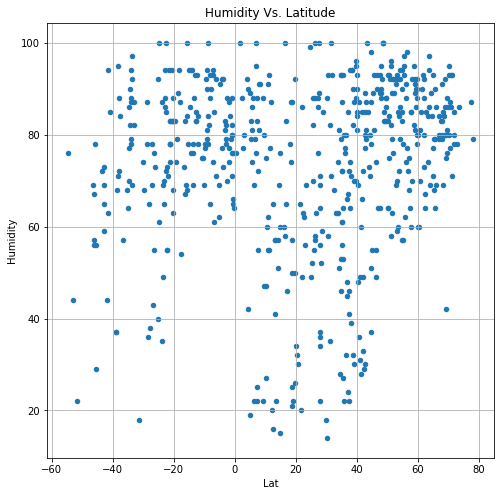

In [9]:
# Convert the "Humidity" column to numeric to ensure the data can be used
clean_city_data['Humidity'] = pd.to_numeric(clean_city_data['Humidity'])

# Create a scatter plot which compares Latitude to Temperature
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
              title="Humidity Vs. Latitude")
plt.show()

## Latitude vs. Cloudiness Plot

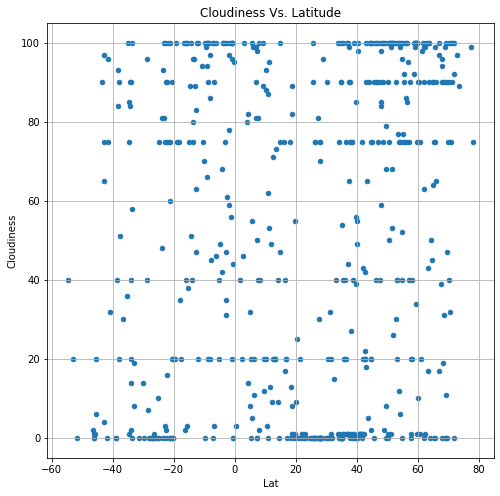

In [10]:
# Convert the "Cloudiness" column to numeric to ensure the data can be used
clean_city_data['Cloudiness'] = pd.to_numeric(clean_city_data['Cloudiness'])

# Create a scatter plot which compares Latitude to Temperature
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
              title="Cloudiness Vs. Latitude")
plt.show()

This plot seems to reflect inaccurate or imprecise data. The lined up figures suggest that either the OpenWeatherAPI doesn't have granular wind data, or that the calls were not accurate.

## Latitude vs. Wind Speed Plot

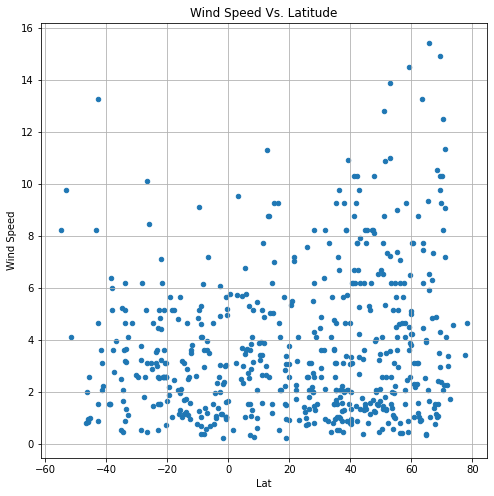

In [11]:
# Convert the "Wind Speed" column to numeric to ensure the data can be used
clean_city_data['Wind Speed'] = pd.to_numeric(clean_city_data['Wind Speed'])

# Create a scatter plot which compares Latitude to Temperature
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
              title="Wind Speed Vs. Latitude")
plt.show()

This plot examines the relationship between wind speed and latitude. It is notable that there are higher wind speeds in high latitudes in winter. Weather patterns such as the famous 'Alberta Clipper,' which drives extreme wind chills across the Midwest, might be partly explained in this data. It would be interesting to see whether there is a rise is number of high wind speeds near the south pole during June - August, when temperatures are colder, and to learn about the temperature/wind speed relationship.

## Linear Regression

Note: for the following graphs, I set latitude as the x-axis because a) it seems more appropriate as the independent variable and b) it allows consistency and potential comparison across the graphs.

In [12]:
#create separate df's for northern and southern hemispheres
north_data = clean_city_data[clean_city_data['Lat'] >= 0] 
south_data = clean_city_data[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7017060951972586


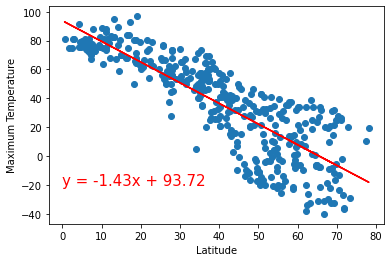

In [21]:
x_values = north_data['Lat']
#conver Kelvin to Fahrenheit
y_values = (north_data['Max Temp'] - 273.15) * 9/5 +32
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Northern Hemisphere- Latitude and Maximum Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This data, with an r-squared value at ~.7, shows a strong correlation between Northern Hemisphere latitude and max temp. While unsurprising, the regression gives statistical confirmation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3030358505017034


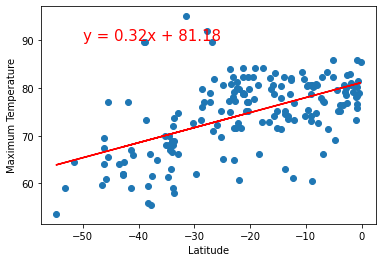

In [23]:
x_values = south_data['Lat']
#Convert Kelvin to Fahrenheit
y_values = (south_data['Max Temp'] - 273.15) *9/5 +32
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Southern Hemisphere- Latitude and Maximum Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This data, with an r-squared value near .3, is suprising insofar as latitude and maximum temperature do not have a strong correlation. In summer months, what other factors determine maximum temperatures if latitude is relatively less important than in winter?

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = north_data['Lat']
y_values = north_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere- Latitude and Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

with an r-squared near .1, there is little relationship demonstrated in this data between humidity and latitude. To explain humidity, we should study other factors.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12271726496659073


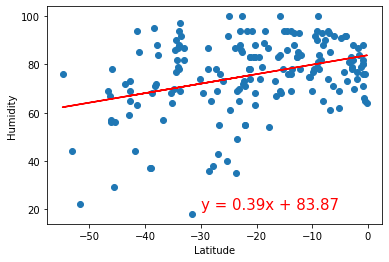

In [16]:
x_values = south_data['Lat']
y_values = south_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere- Latitude and Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

With an r-squared value near .1, this shows, like the counterpart plot above, little correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08659005512116211


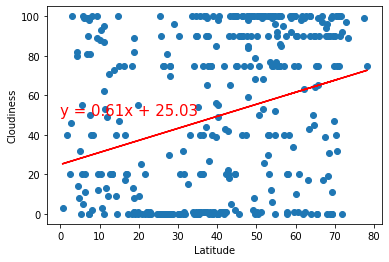

In [17]:
x_values = north_data['Lat']
y_values = north_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere- Latitude and Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

With an r-squared value < .1, this shows very little correlation betweeen latitude and cloudiness in the Northern Hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11671956752569095


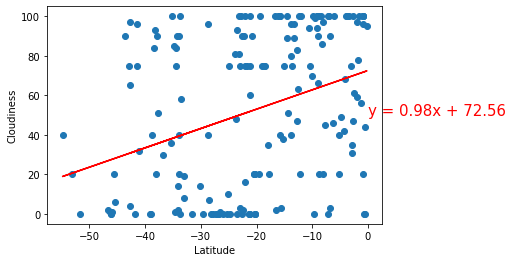

In [18]:
x_values = south_data['Lat']
y_values = south_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere- Latitude and Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

With an r-squared value just over .1, this shows very little correlation betweeen latitude and cloudiness in the Southern Hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.021949856208057898


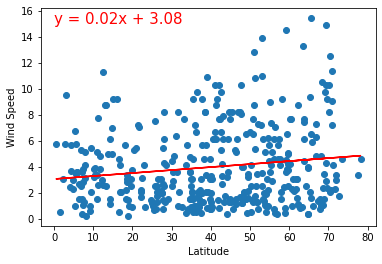

In [24]:
x_values = north_data['Lat']
y_values = north_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere- Latitude and Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

With an r-squared value of ~.02, this demonstrates little correlation between wind speed and latitude. It is notable, however, that all wind speeds over 12 appear to be in latitudes over 50, and the bulk of high wind speeds are in latitudes above 40. there is also high density of low wind speed around latitude 40.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03155078736254538


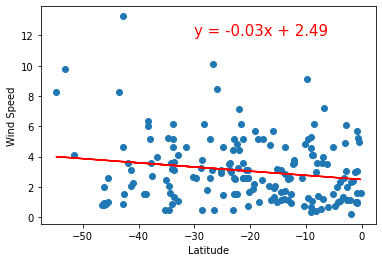

In [25]:
x_values = south_data['Lat']
y_values = south_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere- Latitude and Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

With an r-squared value ~.03, this shows little correlation between wind speed and latitude in the southern hemisphere. the gentle slope of the line suggests this as well, although there are relatively few data points here.